In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from numpy.random import random, shuffle
%matplotlib inline

In [201]:
data = np.loadtxt("input.data")
X, Y = np.split(data,[2], 1)
print(X.shape, Y.shape)
X = X.T
Y = Y.T
print(X.shape, Y.shape)

(16, 2) (16, 3)
(2, 16) (3, 16)


In [202]:
learning_rate = 0.5
momentum = 0.9
'''
w1 = np.array([[0.5]])
w2 = np.ones((20,1))*0.5
w3 = np.ones((1,20))*0.5
'''
n_units = 20
dim_input = 2
dim_output = 3
w1 = (np.ones((dim_input, dim_input))*0.5)
w2 = (np.ones((n_units, dim_input))*0.5)
w3 = (np.ones((dim_output, n_units))*0.5)
b1 = np.ones((dim_input, 1))*0.5
b2 = np.ones((n_units,1))*0.5
b3 = np.ones((dim_output, 1))*0.5
W = [w1,w2,w3]
B = [b1,b2,b3]
A = dict()
Z = dict()
g_W_prev = [0*w1, 0*w2, 0*w3]
g_B_prev = [0*b1, 0*b2, 0*b3]

In [203]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    f = sigmoid(x)
    df = f * (1 - f)
    return df

In [204]:
def forward_prop(X, W, B):
    '''
    All output function the same: sigmoid
    '''
    input_vec = X
    #print(X)
    for idx in range(len(W)):
        # print(W[idx], input_vec)
        Z[idx] = W[idx].dot(input_vec) + B[idx]
        A[idx] = sigmoid(Z[idx])
        input_vec = A[idx]
    return Z, A

In [205]:
def predict(X_test):
    print(X_test.shape)
    Y_test = forward_prop(X_test, W, B)[1][len(W)-1]
    print(Y_test.shape)
    return np.argmax(Y_test,axis=0)

In [206]:
def back_prop(Y, W, B, X, A, Z):
    N = A[2].shape[1]

    delta3 = - (Y - A[2])
    delta2 = (W[2].T.dot(delta3))*d_sigmoid(Z[1])
    delta1 = (W[1].T.dot(delta2))*d_sigmoid(Z[0])
    
    g_w3 = delta3.dot(A[1].T)/ N
    g_w2 = delta2.dot(A[0].T)/ N
    g_w1 = delta1.dot(X.T)/ N

    g_b1 = np.mean(delta1, axis=1, keepdims=True)
    g_b2 = np.mean(delta2, axis=1, keepdims=True)
    g_b3 = np.mean(delta3, axis=1, keepdims=True)
    
    return [g_w1,g_w2,g_w3], [g_b1,g_b2,g_b3]

In [207]:
def update(g_W, g_B):
    for idx, paras in enumerate(zip(W, g_W)):
        W[idx] -= paras[1] * learning_rate + g_W_prev[idx]
    for idx, paras in enumerate(zip(B, g_B)):
        B[idx] -= paras[1] * learning_rate + g_B_prev[idx]

In [208]:
def error():
    _, A = forward_prop(X, W, B)
    Y_hat = A[2]
    loss = np.sum((Y_hat-Y) **2)/2
    return loss

In [209]:
def iterate():
    Z, A = forward_prop(X, W, B)
    g_W, g_B = back_prop(Y, W, B, X, A, Z)
    update(g_W, g_B)

In [210]:
def test(test_x):
    _ , A = forward_prop(np.array([test_x]), W, B)
    return A[2]

In [211]:
def get_figure():
    plt.scatter(*X)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])


In [224]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, predict_func, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X_test = np.array(list(zip(xx.ravel(),yy.ravel()))).T
    Y_test = predict_func(X_test)
    Y_test = Y_test.reshape(xx.shape)
    out = ax.contour(xx, yy, Y_test, 3, **params)
    #out = ax.contourf(xx, yy, Y_test, 3, **params)
    return out

(0, 1)

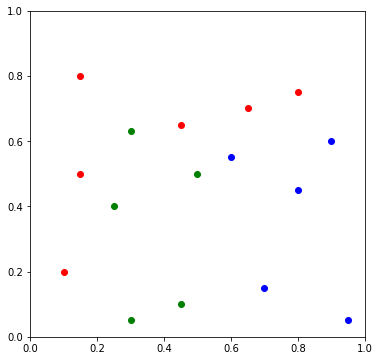

In [214]:
plt.figure(figsize=(6,6))
color_mapping = {0:'red', 1:'green', 2:'blue'}
for label, color in color_mapping.items():
    plt.scatter(*X[:, np.where(Y[label,:]==1)], c=color)
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])

# Results

## Initial error / figure

In [216]:
error()

15.991435178437124

## After 3000 Iterations

In [233]:
for _ in range(300000):
    iterate()

(2, 22500)
(3, 22500)


(0, 1)

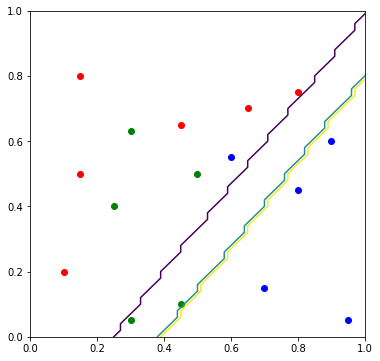

In [234]:
plt.figure(figsize=(6,6))
color_mapping = {0:'red', 1:'green', 2:'blue'}
axes = plt.gca()
rag = np.array([0,1])
xx,yy = make_meshgrid(rag,rag)
plot_contours(axes, predict, xx, yy)
for label, color in color_mapping.items():
    plt.scatter(*X[:, np.where(Y[label,:]==1)], c=color)
axes.set_xlim([0,1])
axes.set_ylim([0,1])

In [219]:
error()

3.4996494126525999